<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/039__Data_Cleaning_Walkthrough_Combining_the_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 5/6: DATA CLEANING IN PYTHON: ADVANCED

# MISSION 2: Data Cleaning Walkthrough: Combining the Data


Learn how to combine multiple data sets to get a single, clean data set.

## 1. Introduction

In the last mission, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several data sets about [New York City public schools](https://data.cityofnewyork.us/data?cat=education). We manipulated these data sets, and found that we could combine them all using the `DBN` column. All of the data sets are currently stored as keys in the `data` dictionary. Each individual data set is a pandas dataframe.

In this mission, we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the `DBN` column were unique in the `sat_results` data set. Other data sets like `class_size` had duplicate `DBN` values, however.

We'll need to condense these data sets so that each value in the `DBN` column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, `sat_results`, has unique `DBN` values for every high school in New York City, other data sets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` data set, for example. This situation will create problems, because we don't know which of the multiple entries in the `class_size` data set we should combine with the single matching entry in `sat_results`. Here's a diagram that illustrates the problem:


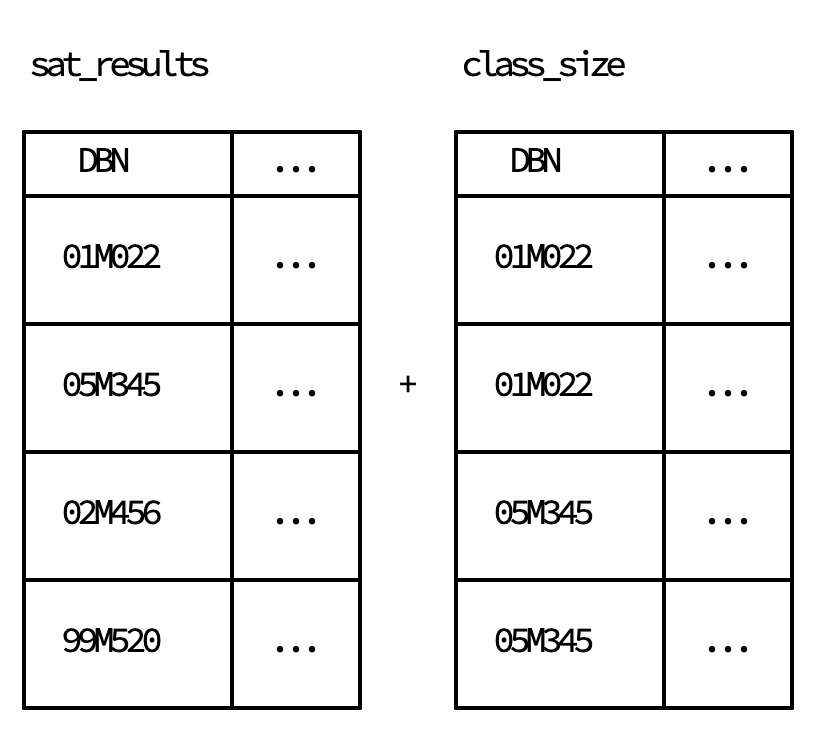

In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in `class_size` match a single row in `sat_results`.

To resolve this issue, we'll condense the `class_size`, `graduation`, and `demographics` data sets so that each `DBN` is unique.

In [ ]:
# Loading the files
# Download the files from the links below:
# "ap_2010.csv": https://drive.google.com/file/d/1KuI49etwQLsPS67JbVv4JPBcqPAh0bPe/view?usp=sharing
# 'class_size.csv': https://drive.google.com/file/d/1KuI49etwQLsPS67JbVv4JPBcqPAh0bPe/view?usp=sharing
# 'demographics.csv': https://drive.google.com/file/d/1gsKvOdzOBl2gllcOycsTRIv6n5q_uyjU/view?usp=sharing
# 'graduation.csv': https://drive.google.com/file/d/1EA4qZSFxAtnkiA0XeZuhFuIUoRnd844H/view?usp=sharing
# 'hs_directory.csv': https://drive.google.com/file/d/1JkSe5aOrSbBonyeY_1cbv2HQi_K27YnR/view?usp=sharing
# 'sat_results.csv': https://drive.google.com/file/d/1ccb_BgcwfoBveOQQ7iqvRPuDvqP3BQFt/view?usp=sharing
# 'survey_all.txt': https://drive.google.com/file/d/1f1czoKEPHDtyM7u6Kr6FJbNOPZfy4rD6/view?usp=sharing
# 'survey_d75.txt': https://drive.google.com/file/d/1HZMJ3JYHDFZcv6sDSMqP2_CElIU_e5UX/view?usp=sharing


In [ ]:
# Import files directly using Google Colab
from google.colab import files
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()
upload = files.upload()

Saving ap_2010.csv to ap_2010.csv


Saving class_size.csv to class_size.csv


Saving demographics.csv to demographics.csv


Saving graduation.csv to graduation.csv


Saving hs_directory.csv to hs_directory.csv


Saving sat_results.csv to sat_results.csv


Saving survey_all.txt to survey_all.txt


Saving survey_d75.txt to survey_d75.txt


In [ ]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for f in data_files:
    d = pd.read_csv("{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d

## 2. Condensing the Class Size Data Set

The first data set that we'll condense is class_size. The first few rows of class_size look like this:

In [ ]:
print(data["class_size"].head())

   CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
0    1       M  ...         ATS                            NaN
1    1       M  ...         ATS                            NaN
2    1       M  ...         ATS                            NaN
3    1       M  ...         ATS                            NaN
4    1       M  ...         ATS                            NaN

[5 rows x 16 columns]


As you can see, the first few rows all pertain to the same school, which is why the `DBN` appears more than once. It looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

If we look at the unique values for `GRADE`, we get the following:

```
array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)
```


Because we're dealing with high schools, we're only concerned with grades `9` through `12`. That means we only want to pick rows where the value in the `GRADE` column is `09-12`.

If we look at the unique values for `PROGRAM TYPE`, we get the following:

```
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
```

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.

## 3. Condensing the Class Size Data Set

**Instructions:**

- Create a new variable called `class_size`, and assign the value of `data["class_size"]` to it.
- Filter `class_size` so the `GRADE`  column only contains the value `09-12`. Note that the name of the `GRADE`  column has a space at the end; you'll generate an error if you don't include it.
- Filter `class_size` so that the `PROGRAM TYPE` column only contains the value `GEN ED`.
- Display the first five rows of `class_size` to verify.


In [ ]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
print(class_size.head())

     CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
225    1       M  ...       STARS                            NaN
226    1       M  ...       STARS                            NaN
227    1       M  ...       STARS                            NaN
228    1       M  ...       STARS                            NaN
229    1       M  ...       STARS                            NaN

[5 rows x 16 columns]


## 4. Computing Average Class Sizes

As we saw when we displayed `class_size` on the last screen, `DBN` still isn't completely unique. This is due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns.

`CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` seem to pertain to different kinds of classes. For example, here are the unique values for `CORE SUBJECT (MS CORE and 9-12 ONLY)`:
```
array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)
```
This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique `DBN` values, while also incorporating as much data as possible into the average.

Fortunately, we can use the pandas.[DataFrame.groupby()](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method to help us with this. The `DataFrame.groupby()` method will split a dataframe up into unique groups, based on a given column. We can then use the [agg()](http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation) method on the resulting `pandas.core.groupby` object to find the mean of each column.

Let's say we have this data set:

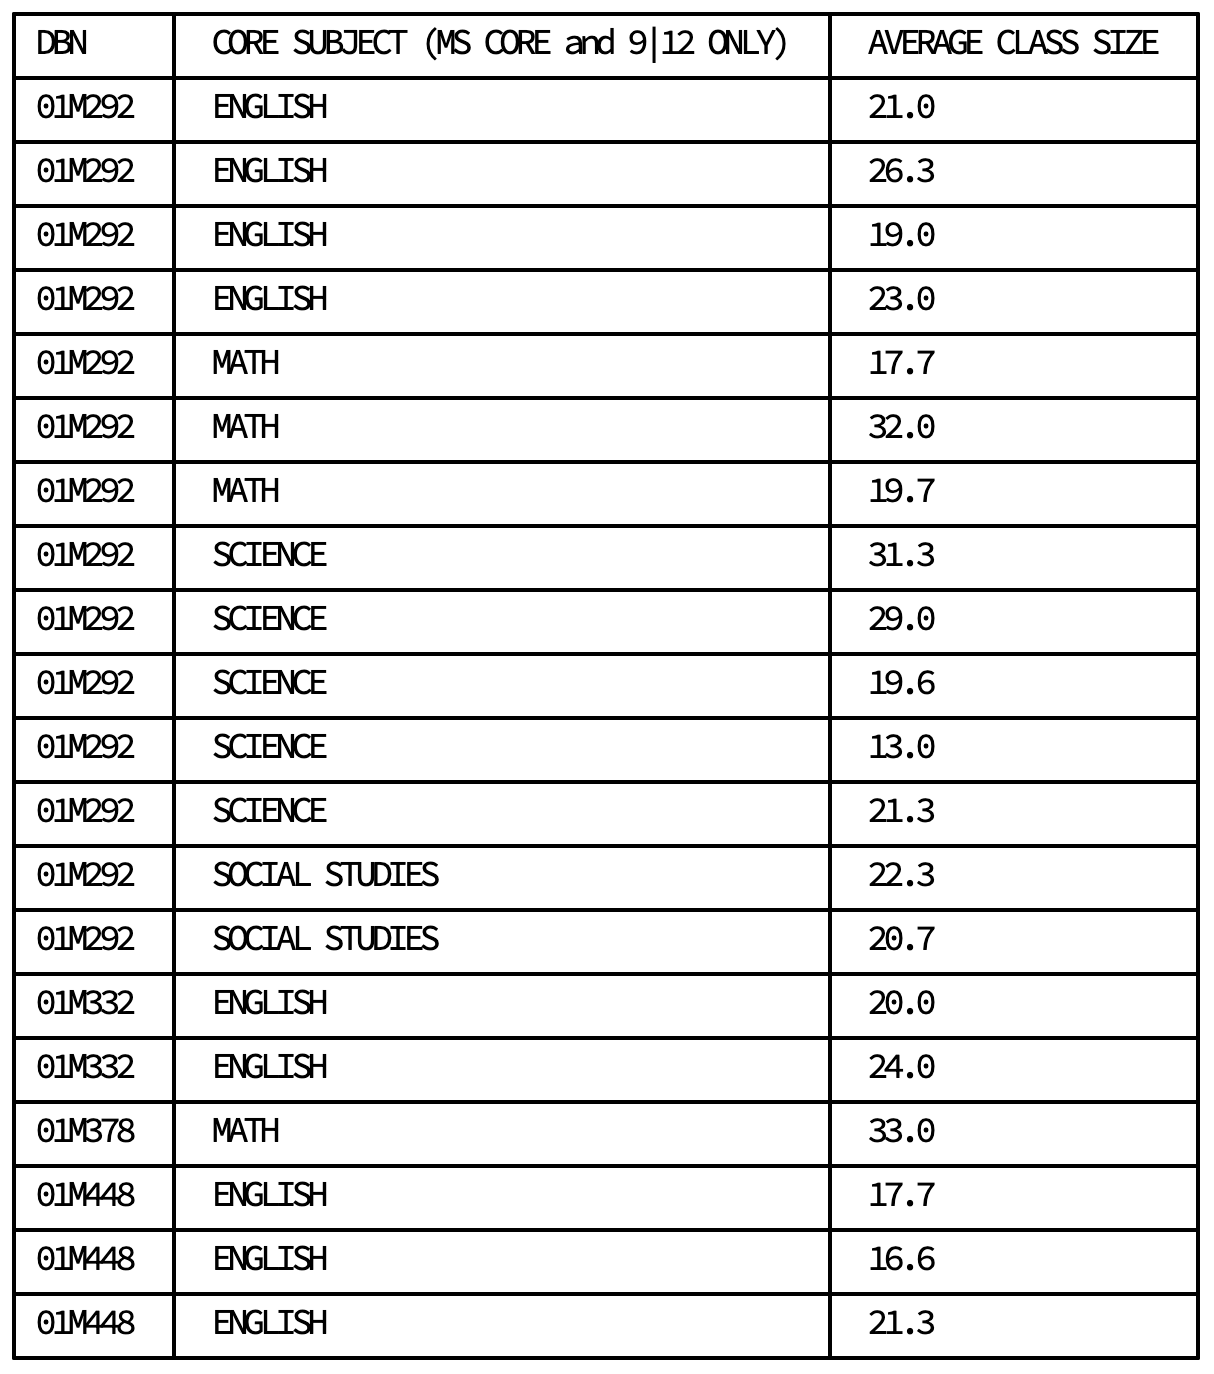

Using the `groupby()` method, we'll split this dataframe into four separate groups -- one with the `DBN 01M292`, one with the `DBN 01M332`, one with the `DBN 01M378`, and one with the `DBN 01M448`:

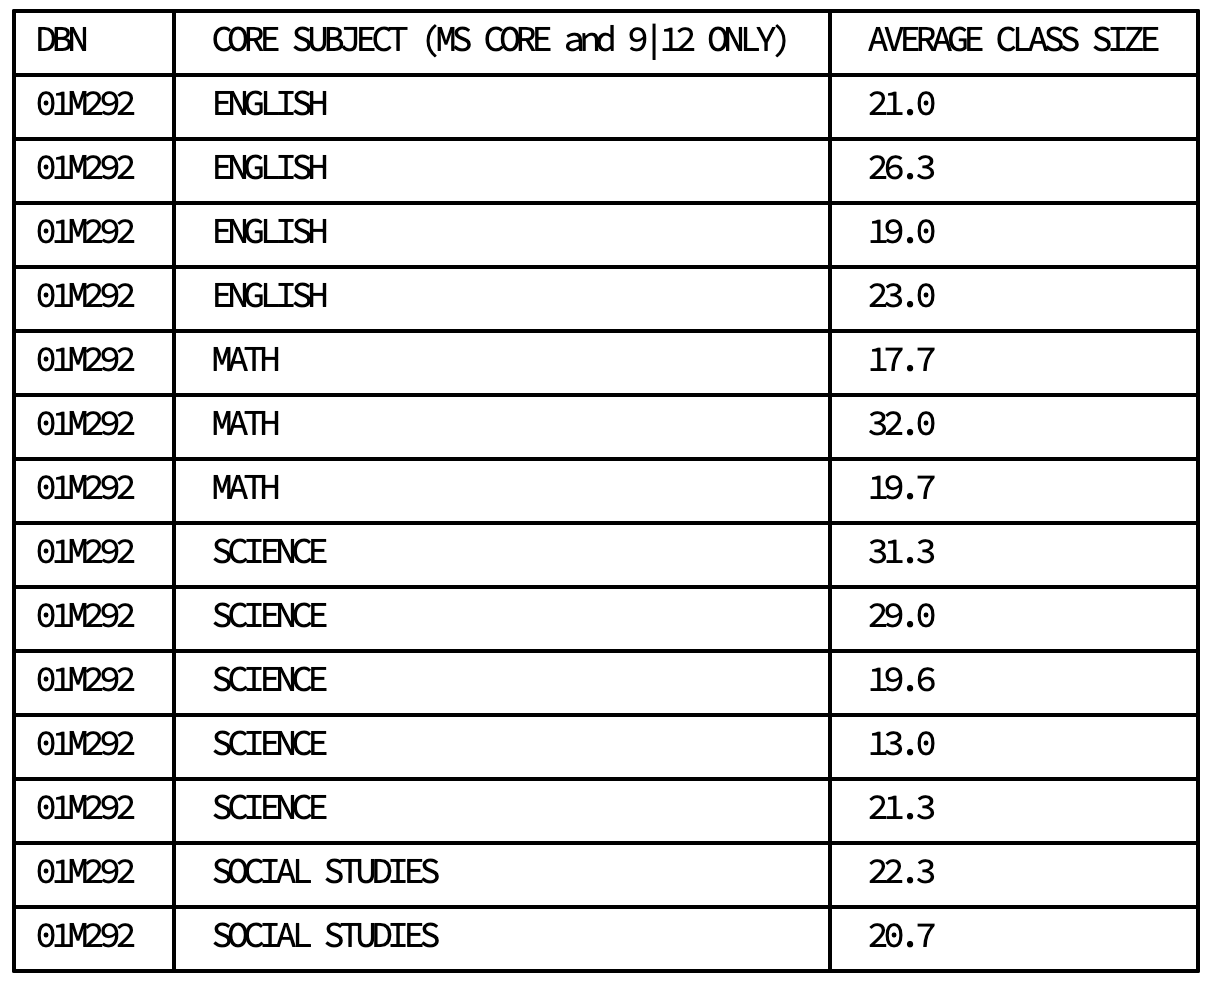

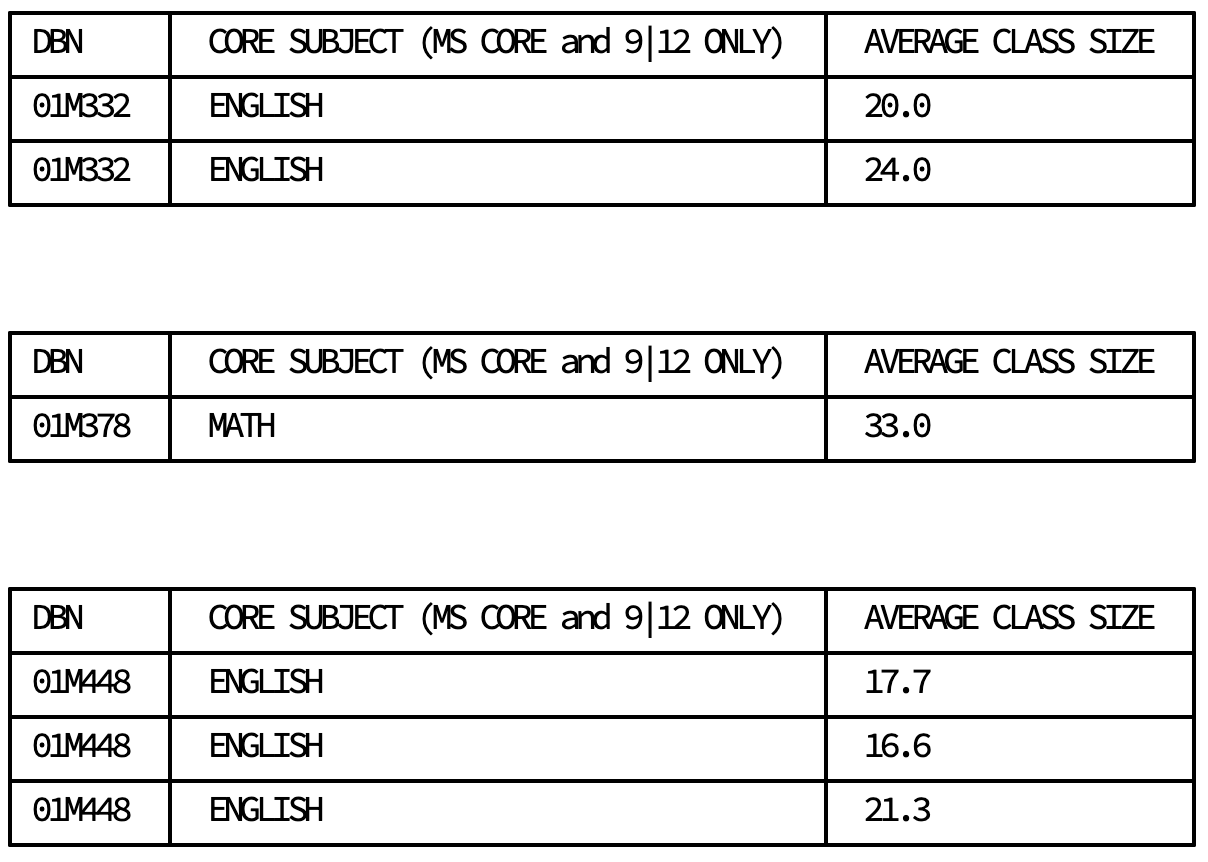

Then, we can compute the averages for the `AVERAGE CLASS SIZE` column in each of the four groups using the `agg()` method:

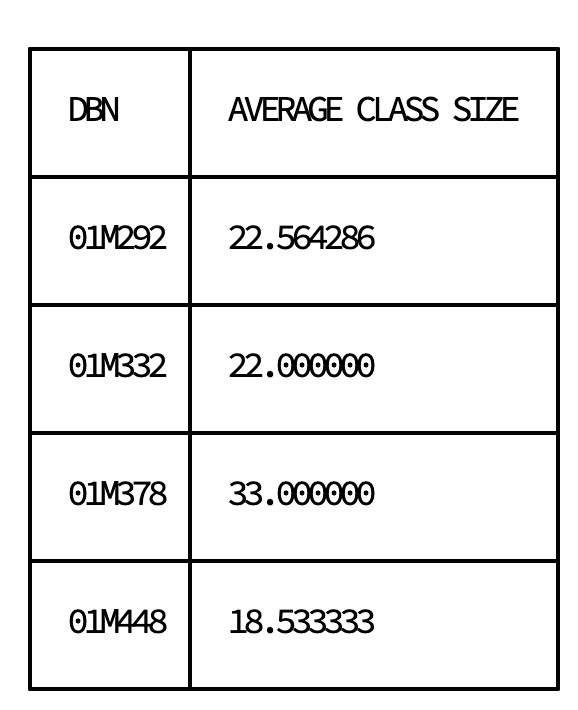

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case `DBN`) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep `DBN` as a column, we'll need to use [pandas.DataFrame.reset_index()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html). This method will reset the index to a list of integers and make `DBN` a column again.

## 5. Computing Average Class Sizes

## 6. Condensing the Demographics Data Set

## 7. Condensing the Demographics Data Set

## 8. Condensing the Graduation Data Set

## 9. Condensing the Graduation Data Set

## 10. Converting AP Test Scores

## 11. Left, Right, Inner, and Outer Joins

## 12. Performing the Left Joins

## 13. Performing the Inner Joins

## 14. Filling in Missing Values

## 15. Filling in Missing Values

## 16. Adding a School District Column for Mapping